# [실습] 산점도와 히트맵

산점도와 히트맵은 데이터의 상관관계를 볼 때 유용한 그래프입니다.

## 1. 데이터 불러오기

먼저 실습 진행을 위해 `seaborn`과 `matplotlib`를 import 하겠습니다.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["axes.unicode_minus"] = False
plt.rc("font", family="AppleGothic")

데이터 분석에서 널리 사용되는 파이썬 패키지 중 하나인 pandas는 데이터를 처리하고 조작하는 데 필수적인 도구를 제공합니다. 

아래 코드에서는 `pandas`를 `pd`라는 이름으로 import 합니다.

In [2]:
import pandas as pd

실습에 사용할 데이터는 2016년 1월 1일부터 2019년 3월 31일까지의 서울대공원 입장객 데이터입니다. 데이터에는 날짜, 공휴일 여부, 입장객 연령 등 다양한 정보가 저장되어 있습니다.

이제 data 폴더에 저장되어 있는 데이터인 seoul_park.csv 파일을 불러와 데이터 프레임 `df`에 저장합니다.

In [3]:
df = pd.read_csv("./data/seoul_park.csv")

이제 데이터 프레임 `df`에 서울대공원 입장객 데이터가 저장되어 있습니다.

`head(n)` 함수를 사용하면 데이터 프레임의 앞에서부터 `n`개의 데이터를 확인해볼 수 있습니다.

만약 `n`을 전달하지 않으면 5개의 데이터를 볼 수 있습니다.

In [4]:
df.head()

,Unnamed: 0,날짜,요일,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,매출액
0,0,2016-01-01,금,O,구름 조금,2799,141.0,419,47,0,4382,2016,1,1,33590000
1,1,2016-01-02,토,O,구름 많음,4370,203.0,600,100,111,7265,2016,1,2,51730000
2,2,2016-01-03,일,O,구름 많음,2571,128.0,309,91,0,4557,2016,1,3,30080000
3,3,2016-01-04,월,X,구름 많음,602,463.0,235,51,223,1690,2016,1,4,8900000
4,4,2016-01-05,화,X,구름 많음,319,35.0,62,43,47,1256,2016,1,5,4160000


반대로 뒤에서부터 데이터를 확인하려면 `tail(n)` 함수를 사용합니다.

In [5]:
df.tail()

,Unnamed: 0,날짜,요일,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,매출액
1081,1081,2019-03-27,수,X,구름 많음,464,10.0,30,21,0,1117,2019,3,27,5040000
1082,1082,2019-03-28,목,X,구름 많음,687,46.0,28,35,108,1665,2019,3,28,7610000
1083,1083,2019-03-29,금,X,구름 조금,1447,120.0,77,14,188,2870,2019,3,29,16440000
1084,1084,2019-03-30,토,O,흐림,1326,44.0,169,29,115,2452,2019,3,30,15390000
1085,1085,2019-03-31,일,O,구름 조금,2563,111.0,387,53,0,4418,2019,3,31,30610000


이렇게 데이터를 불러왔다면 먼저 `head()`함수나 `tail()`함수를 이용해 데이터의 모양을 살펴보는 것이 좋습니다.

다음에는 `info()`함수를 이용해 데이터의 칼럼의 정보를 살펴보겠습니다.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1086 non-null   int64  
 1   날짜          1086 non-null   object 
 2   요일          1086 non-null   object 
 3   공휴일         1086 non-null   object 
 4   날씨          939 non-null    object 
 5   어른          1086 non-null   int64  
 6   청소년         1086 non-null   float64
 7   어린이         1086 non-null   int64  
 8   외국인         1086 non-null   int64  
 9   단체          1086 non-null   int64  
 10  총입장객수       1086 non-null   int64  
 11  연           1086 non-null   int64  
 12  월           1086 non-null   int64  
 13  일           1086 non-null   int64  
 14  매출액         1086 non-null   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 127.4+ KB


## 2. 산점도

산점도 그래프는 데이터의 두 변수 간의 관계를 시각화하는 데 사용되는 통계적 그래프입니다. 

일반적으로 산점도 그래프는 비교적 쉽게 생성할 수 있으며, 주로 데이터 시각화나 탐색적 데이터 분석(EDA)에 사용됩니다. 

예를 들어, 두 변수 간의 선형적인 관계를 확인하거나, 이상치나 군집을 찾을 수 있습니다.

먼저 어른 입장객 수와 청소년 입장객 수의 산점도 그래프를 그려보겠습니다.

산점도 그래프는 `plt.scatter()` 함수를 사용합니다.

산점도를 보고 싶은 두 데이터를 순서대로 전달하면 산점도 그래프가 그려집니다.

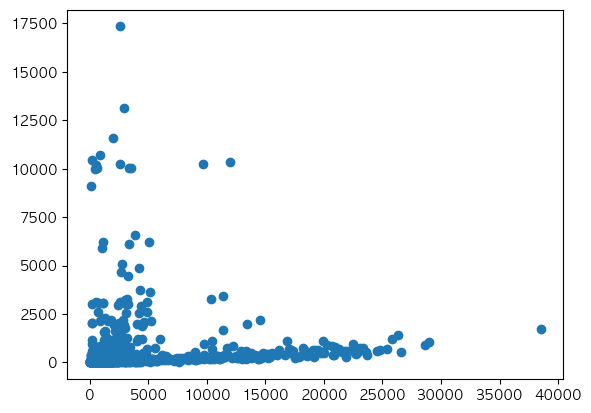

In [7]:
# 산점도 그래프
plt.scatter(df['어른'], df['청소년'])
plt.show()

위 그래프를 보면 어른 입장객 수와 청소년 입장객 수의 상관관계는 분명히 존재하지만, 크지 않을 것을 직관적으로 확인할 수 있습니다.

물론 이것은 그래프를 보고 내린 직관이며, 정밀하게 상관관계가 있는지 파악하려면 상관계수를 구하는 작업이 필요합니다.

이어서 어른과 어린이 입장객 수의 산점도 그래프를 그려보겠습니다.

<Axes: xlabel='어른', ylabel='어린이'>

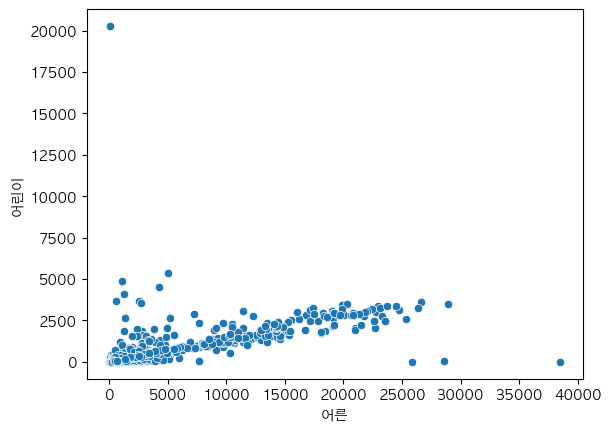

In [8]:
# 어른과 어린이 입장객수의 상관관계 산점도
sns.scatterplot(data=df, x='어른', y='어린이')

청소년과 어른의 관계보다 큰 상관관계를 보이는 것을 직관적으로 확인할 수 있습니다.

이 그래프는 seaborn을 이용하면 아래와 같이 그릴 수 있습니다.

<Axes: xlabel='어른', ylabel='어린이'>

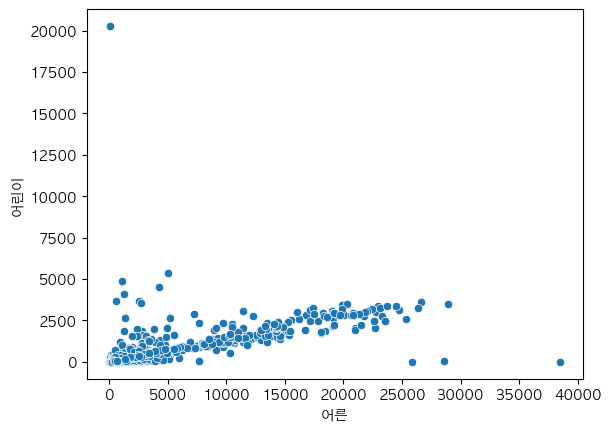

In [9]:
# 어른과 어린이 입장객수의 상관관계 산점도
sns.scatterplot(data=df, x='어른', y='어린이')

`sns.scatterplot()`함수를 통해 그릴 수 있으며, `data`에 데이터 프레임을, x와 y에 각각 칼럼의 이름을 전달하면 그릴 수 있습니다.

위 그래프를 보시면 y축 6000이상으로는 점이 하나밖에 없습니다.

또한, x축도 35000이상에는 점이 하나밖에 없습니다.

우리가 더 유의미한, 점들이 많이 몰려있는 구간에 집중하기 위해서 범위를 제한할 수 있습니다.

`ylim()`, `xlim()` 함수를 통해 각각 y축과 x축의 범위를 조절할 수 있습니다.

(0.0, 35000.0)

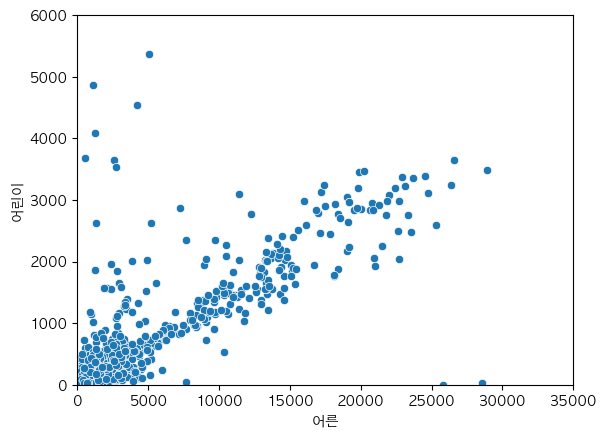

In [10]:
sns.scatterplot(data=df, x="어른", y="어린이")

plt.ylim(0, 6000)  # y축 범위를 0에서 6000으로 제한
plt.xlim(0, 35000)  # x축 범위를 0에서 35000으로 제한

## 3. 히트맵

히트맵(Heatmap)은 데이터 값의 상대적인 크기를 색상으로 표시하여 시각화하는 그래프입니다. 

데이터의 밀도, 패턴, 상관 관계 등을 시각적으로 파악할 수 있습니다.

위 산점도 그래프를 보면서 우리는 입장객의 유형간의 어느정도 상관관계가 존재할 것으로 예상할 수 있었습니다.

두 칼럼의 상관관계를 구하기 위해서 피어슨 상관계수라는 것을 계산합니다.

In [11]:
# 피어슨 상관계수
df_corr = df.corr(numeric_only=True)
df_corr

,Unnamed: 0,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,매출액
Unnamed: 0,1.000000,-0.129602,-0.123936,-0.112757,-0.263132,-0.110094,-0.158224,0.951891,0.101772,0.029936,-0.156220
어른,-0.129602,1.000000,0.079024,0.643471,0.697684,0.094074,0.964853,-0.124890,0.020178,-0.060220,0.964623
청소년,-0.123936,0.079024,1.000000,0.130108,0.073324,0.774788,0.276590,-0.120612,-0.000923,0.022924,0.307690
어린이,-0.112757,0.643471,0.130108,1.000000,0.408734,0.245117,0.701560,-0.122339,0.050375,0.002829,0.731451
외국인,-0.263132,0.697684,0.073324,0.408734,1.000000,0.014294,0.667474,-0.258235,0.023805,-0.067818,0.670458
단체,-0.110094,0.094074,0.774788,0.245117,0.014294,1.000000,0.272871,-0.117731,0.038911,0.085037,0.292723
총입장객수,-0.158224,0.964853,0.276590,0.701560,0.667474,0.272871,1.000000,-0.153188,0.021460,-0.041487,0.988557
연,0.951891,-0.124890,-0.120612,-0.122339,-0.258235,-0.117731,-0.153188,1.000000,-0.197236,0.009130,-0.152929
월,0.101772,0.020178,-0.000923,0.050375,0.023805,0.038911,0.021460,-0.197236,1.000000,-0.016435,0.024640
일,0.029936,-0.060220,0.022924,0.002829,-0.067818,0.085037,-0.041487,0.009130,-0.016435,1.000000,-0.044896


상관계수의 절대값이 1에 가까울수록 두 칼럼은 유의미한 상관관계가 있다는 것을 의미합니다.

지금은 11개의 수치형 칼럼이 있기에 11x11개의 상관관계가 그려졌습니다.

이렇게 칼럼이 많이 존재하면 하나하나 상관관계를 확인하기 어려우므로 히트맵이라는 시각화 그래프를 이용합니다.

<Axes: >

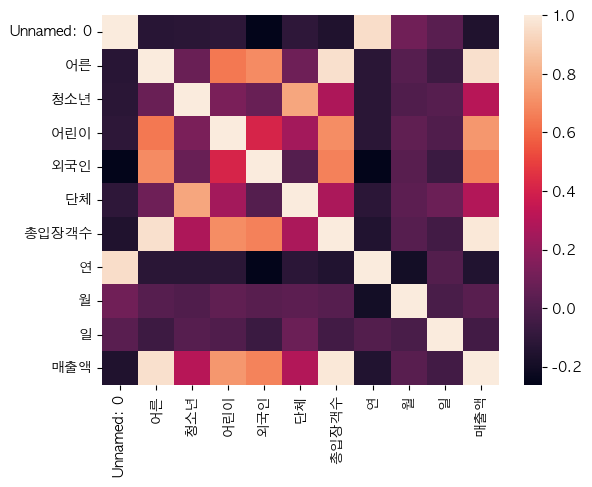

In [12]:
# 히트맵
sns.heatmap(df_corr)

이렇게 히트맵을 그려보면 하얀색에 가까울수록 상관관계가 높은 것을 볼 수 있습니다.

우리가 산점도 그래프를 그리며 예측한 것 처럼 어른과 어린이 입장객 사이에는 높은 상관관계가 있는 것을 파악할 수 있습니다.

## [TODO] 매출액의 상관관계
 
위에서 그려본 히트맵과 피어슨 상관계수를 참고하여 `"어른"`, `"청소년"`, `"어린이"`를 `"매출액"`과 상관관계가 강한 순서대로 나열하세요.

만약 어른과 매출액의 상관관계가 가장 강하고 그 다음 청소년, 어린이 순으로 매출액과 상관관계가 강하다면 아래와 같은 코드로 칼럼의 이름을 전달합니다.

```py
todo = ["어른", "청소년", "어린이"]
```

In [16]:
df_corr['매출액'].sort_values(ascending=False)

매출액           1.000000
총입장객수         0.988557
어른            0.964623
어린이           0.731451
외국인           0.670458
청소년           0.307690
단체            0.292723
월             0.024640
일            -0.044896
연            -0.152929
Unnamed: 0   -0.156220
Name: 매출액, dtype: float64

In [17]:
todo = ['어른', '어린이', '청소년']  # None을 지우고 위 문제의 정답을 전달하세요